<a href="https://colab.research.google.com/github/nhatminh-it/CS114.K21/blob/master/predict_time_from_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICT TIME TO RUN FROM SIZE DATA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### **Load, check, handing data**

In [0]:
dataset = pd.read_csv("https://cs.uit.edu.vn/data.txt", names =['size', 'time'] )

In [3]:
dataset.head()

,size,time
0,4032139,1.200580
1,2055486,0.509774
2,5626651,1.476080
3,42065,0.007651
4,6297788,1.661560


In [0]:
dataset['size**2']=dataset['size']*dataset['size']
dataset['size.log(size)']=dataset['size']*np.log10(dataset['size'])
columns_titles = ["size","size**2","size.log(size)","time"]
dataset=dataset.reindex(columns=columns_titles)

In [5]:
dataset.head()

,size,size**2,size.log(size),time
0,4032139,16258144915321,2.663444e+07,1.200580
1,2055486,4225022696196,1.297611e+07,0.509774
2,5626651,31659201475801,3.798130e+07,1.476080
3,42065,1769464225,1.945052e+05,0.007651
4,6297788,39662133692944,4.281984e+07,1.661560


In [6]:
dataset.describe()

,size,size**2,size.log(size),time
count,5.211000e+03,5.211000e+03,5.211000e+03,5211.000000
mean,4.991583e+06,3.334470e+13,3.385943e+07,1.363322
std,2.903517e+06,2.997776e+13,2.053834e+07,0.825849
min,2.390000e+02,5.712100e+04,5.684371e+02,0.000028
25%,2.451362e+06,6.009176e+12,1.566275e+07,0.630964
50%,5.032102e+06,2.532205e+13,3.372389e+07,1.355770
75%,7.523041e+06,5.659615e+13,5.173139e+07,2.076820
max,9.995358e+06,9.990718e+13,6.996549e+07,3.315540


#### **Data visualization**

<Figure size 576x576 with 0 Axes>

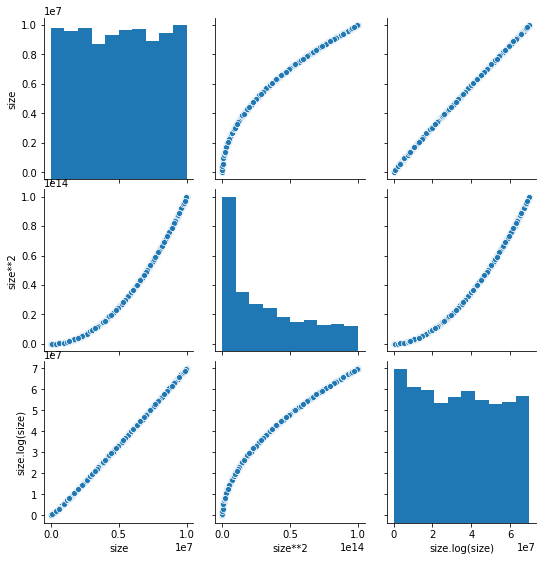

In [7]:
plt.figure(figsize=(8,8))
features = dataset.columns[:-1]
sns.pairplot(dataset[features],palette='coolwarm')
plt.show()

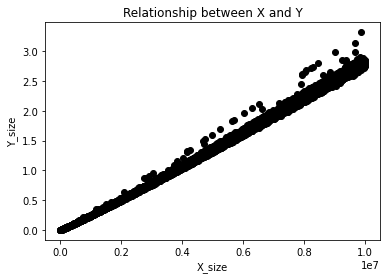

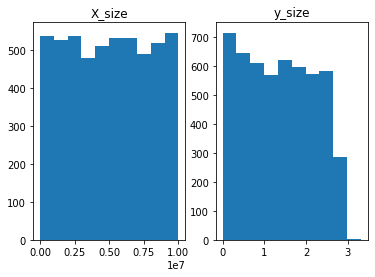

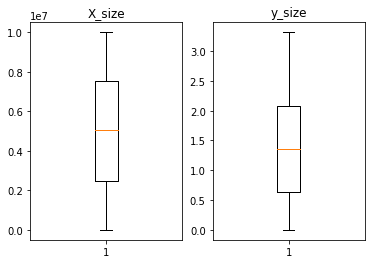

In [8]:
X_size = dataset['size']
y_size = dataset['time']
plt.title('Relationship between X and Y')
plt.scatter(X_size, y_size,  color='black')
plt.xlabel('X_size')
plt.ylabel('Y_size')
plt.show()

plt.subplot(1, 2, 1)
plt.title('X_size')
plt.hist(X_size)

plt.subplot(1, 2, 2)
plt.title('y_size')
plt.hist(y_size)
plt.show()

plt.subplot(1, 2, 1)
plt.title('X_size')
plt.boxplot(X_size)

plt.subplot(1, 2, 2)
plt.title('y_size')
plt.boxplot(y_size)
plt.show()

#### **Evaluate Some Algorithms**

In [0]:
X = dataset.iloc[:,0:3]
y = dataset.iloc[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [10]:
models = []
models.append(('LR :', LinearRegression())) #Linear Regression
models.append(('SVR:', SVR())) #Support Vector Regression
models.append(('DTR:', DecisionTreeRegressor(random_state=1))) #Decision Tree Regression
models.append(('RFR:', RandomForestRegressor(n_estimators = 10, random_state=1))) #Random Forest Regression
# Evaluate each model in turn
names = []
for name, model in models:
  model.fit(X_train,Y_train)
  y_predict = model.predict(X_validation)
  results = mean_absolute_error(Y_validation,y_predict)
  print(name,results)

LR : 0.022466738960920524
SVR: 0.0466377138595479
DTR: 0.034486488830297216
RFR: 0.02946093943943074


#### **Linear Regression is the best model**
Make predictions on validation dataset

In [11]:
test = [[4032139, 16258144915321, 2.663444e+07]]
LR_model = LinearRegression()
LR_model.fit(X_train,Y_train)
y = LR_model.predict(test)
y

array([1.07461698])